# Group Assignment: Data Preparation and Visualization

## 1. Group members

#### Group 32
- Yu-Sheng Chen
- Harsh Jatinbhai Patel
- Sai Chandra Bala
- Priyadharshini Ramesh Kumar

## 2. Contribution report

After completing the assignment, please answer the following questions **as a group** by adding your answers within this markdown block.

1. In a few sentences, describe each group member's individual contributions to the submission. Be as specific as possible (e.g. coordinated group efforts, specific problems answered, specific problems reviewed/revised, sections of the submission written, etc.).

    < Add your responses here>


2. In a few sentences, describe what was learned in completing this assignment. In particular, describe what was learned through the **specific individual contributions** mentioned above.
    
    < Add your responses here>

***

## 3. Assignment

### Instructions: 
You will be presented with a scenario and will need to utilize your SQL and python skills to complete this assignment successfully. 

Put this .ipynb file in the `jupyter_notebooks` folder in your Docker SQLPython Container directory.  Then you will be able to connect to the database and run your code without issue.

Each group will submit two files:
1. A single Jupyter Notebook (.ipynb).  **You must run all cells before submitting.** This notebook should have all of the relevant visualizations and output displayed properly.  We will restart and run all of the code from this notebook, which should not produce any errors.
2. A PDF version (.pdf) of the Jupyter Notebook. This PDF should have all of the relevant visualizations and output displayed properly. 

In [1]:
#run this code first to connect to the database and verify the connection is working
## DO NOT MODIFY THIS CODE BLOCK
## If you have placed this notebook in the jupyter notebooks folder properly, 
## this block should return the first two rows of the customers table

from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

cnxn_string = ("postgresql+psycopg2://{username}:{pswd}"
              "@{host}:{port}/{database}")
print(cnxn_string)

engine = create_engine(cnxn_string.format(
    username="postgres",
    pswd="behappy",
    host="postgres",
    port=5432,
    database="sqlda"))

engine.execute("SELECT * FROM customers LIMIT 2;").fetchall()

postgresql+psycopg2://{username}:{pswd}@{host}:{port}/{database}


[(1, None, 'Arlena', 'Riveles', None, 'ariveles0@stumbleupon.com', 'F', '98.36.172.246', None, None, None, None, None, None, None, datetime.datetime(2017, 4, 23, 0, 0)),
 (2, 'Dr', 'Ode', 'Stovin', None, 'ostovin1@npr.org', 'M', '16.97.59.186', '314-534-4361', '2573 Fordem Parkway', 'Saint Louis', 'MO', '63116', 38.5814, -90.2625, datetime.datetime(2014, 10, 2, 0, 0))]

## Scenario 

You are a team of extremely successful data scientists at a top motor dealership company. You need to create summary tables and visualizations that your boss will present at the next company shareholder meeting.  She has sent you the following e-mail describing what she needs.

***
From: importantboss@topmotordealershipcompany.com

To: datascienceteam@topmotordealershipcompany.com

Subject: Data request for shareholder meeting

For our next shareholder meeting, we need to provide more information about sales performance across states, across dealerships, and across sales channels.  Please send me information to address the following items for our next shareholder meeting along with your thoughts.

1. Sales performance at the state level (top 5 and bottom 5 states)
2. For the best performing states, which dealerships are performing well and how are they trending?
3. In states with dealerships, how has the distribution of sales amounts changed over time for different channels (internet vs. dealership) and sales types (low, typical, high value)?

Thank you!

-Important Boss

***

Your team promptly comes up with the following plan.

## Part 1: Visualizing the top and bottom performing states

1. Write a SELECT query that returns the total sales amount for each state from January 1, 2016 to now.  The table should have two columns, `state` and `total_sales_amount`, with one row for each state ordered by `total_sales_amount` in *descending* order. Make sure that `total_sales_amount` is rounded appropriately.  Attribute sales to states based on the **state in which the customer that made the purchase resides**.  This way we can capture both sales made through dealerships, as well as sales made through our website, in evaluating state-level performance.  


2. Use SQLAlchemy to execute the query and store the results in a pandas dataframe called `sales_by_state`.


3. Display the rows in `sales_by_state` corresponding to the 5 states with the **largest** total sales amount in *descending* order.


4. Display the rows in `sales_by_state` corresponding to the 5 states with the **smallest** total sales amount in *ascending* order.


5. Visualize sales performance by state for the top and bottom performing states discovered in 1.3 and 1.4.  You can use more than one visualization.  These should be **presentation ready** (e.g. appropriate and complete titles and axis labels, remove unnecessary/distracting features, display date range for total sales, no overlapping axis labels, etc.). 

Include the code needed for each component of part 1 in the appropriate code block below.

In [2]:
#1.1


In [3]:
#1.2 create dataframe


In [4]:
#1.3 display top 5 performing states


In [5]:
#1.4 display bottom 5 performing states


In [6]:
#1.5 visualize top and bottom performing states


## Part 2: Top performing dealerships

Create a table and visualization of historical cumulative sales amounts by dealership from January 1, 2016 to now.  Only include dealerships located in the *top two* states determined in Part 1.  It is OK to reference these two states by their abbreviations (e.g. AL, MS, WY) in the query you will develop below since this is a one-off request.

To do this, perform the following steps:
    
   1. Write a SELECT query that returns three columns: `dealership_id`,`state`,`sales_transaction_date`, and `cumulative_sales`.  `cumulative_sales` represents the cumulative sales amount from January 1, 2016 to the `sales_transaction_date` for dealership identified by `dealership_id`.  There should be a row for each distinct combination of `dealership_id` and `sales_transaction_date` in the `sales` table (*hint*: window function).
    
    
   2. Use SQLAlchemy to execute the query and store the results in a pandas dataframe called `cumulative_sales_bydealership`.
    
    
   3. Appropriately visualize historical cumulative sales by dealership across sales transaction dates *in a single plot* (*hint*: seaborn). Visualization should be **presentation ready** (e.g. appropriate and complete titles and legend/axis labels, remove unnecessary/distracting features, display date range for total sales, no overlapping axis labels, integer-valued dealership IDs, states indicated clearly, variable names like `dealership_id` and `state` are replaced with appropriate text like 'ID' and 'State', etc.). 

In [7]:
#2.1
query2 = """
        SELECT dealership_id, state, sales_transaction_date,
        sum(sales_amount) OVER w as cumulative_sales

        FROM sales
        LEFT JOIN dealerships USING(dealership_id)

        WHERE sales_transaction_date::DATE >= '2016-01-01'

        WINDOW w AS (PARTITION BY dealership_id ORDER BY sales_transaction_date)

        ORDER BY dealership_id, sales_transaction_date;
         """

In [8]:
#2.2
cumulative_sales_bydealership = pd.read_sql_query(query2,engine)
print(cumulative_sales_bydealership)

       dealership_id state sales_transaction_date  cumulative_sales
0                1.0    NJ    2016-01-13 23:18:02      4.999900e+02
1                1.0    NJ    2016-01-29 00:24:56      9.999800e+02
2                1.0    NJ    2016-01-29 18:47:45      1.499970e+03
3                1.0    NJ    2016-02-01 01:30:38      6.699997e+04
4                1.0    NJ    2016-02-01 21:45:55      6.749996e+04
...              ...   ...                    ...               ...
27075            NaN  None    2019-05-31 10:15:42      1.011018e+08
27076            NaN  None    2019-05-31 10:24:26      1.011368e+08
27077            NaN  None    2019-05-31 11:52:20      1.011374e+08
27078            NaN  None    2019-05-31 19:39:56      1.012324e+08
27079            NaN  None    2019-05-31 22:51:47      1.012327e+08

[27080 rows x 4 columns]


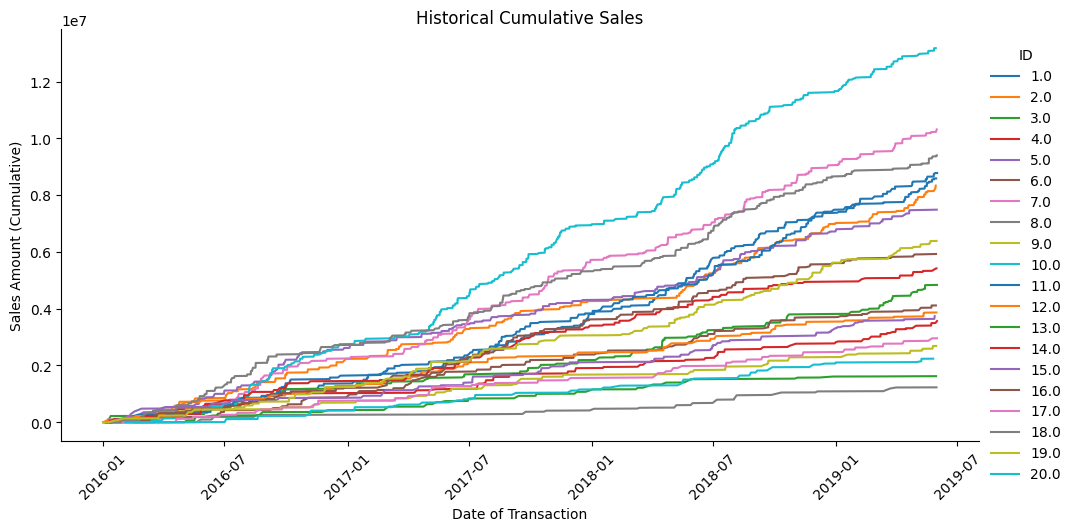

In [13]:
#2.3
cumulative_sales_bydealership.rename(columns={'dealership_id': 'ID',
                                              'sales_transaction_date': 'Date of Transaction',
                                              'cumulative_sales': 'Sales Amount (Cumulative)'},
                                               inplace=True)

# sns.set_palette('tab10')
g2 = sns.relplot(data = cumulative_sales_bydealership,
                 x = 'Date of Transaction',
                 y = 'Sales Amount (Cumulative)',
                 kind = 'line',
                 hue = 'ID',
                 style = 'ID',
                 dashes = False,
                 palette = "tab10",
                 aspect = 2)

g2.fig.suptitle("Historical Cumulative Sales")
            
plt.xticks(rotation=45);


## Part 3: Sales amount by sales channel and sales type

Create tables and visualizations to compare sales amounts by sales channel for sales made on or after January 1, 2016 and before January 1, 2019.  **Only include sales made to customers that reside in a state that has a dealership.** To do this, perform the following steps:
    
   1. Write a SELECT query that returns sales with a transaction date on or after January 1, 2016 and before January 1, 2019 from the `sales` table made to customers that reside in a state that has a dealership.  This table should have the following four columns: `channel`,`sales_amount`, and `sales_type` and `sales_year`. `channel` and `sales_amount` are exactly as appears in the `sales` table. `sales_type` is a derived categorical field that takes on a value of `'High value'` when `sales_amount` is above 50000, `'Typical value'` when `sales_amount` is above 10000 but less than or equal to 50000, and `'Low value'` when `sales_amount` is less than 10000.  `sales_year` is the year from the `sales_transaction_date` field.  
   
   
   2. Use SQLAlchemy to execute the query and store the results in a pandas dataframe called `sales_from_dealershipstates`.
   
   
   3. Appropriately visualize the distribution of sales amounts and how it changes by `channel`, `sales_year`, and `sales_type`.  To do this, create multiple plots, one for each distinct combination of `channel` and `sales_type`.  For each plot, visualize and compare the distribution of sales amounts for each sales year (2016, 2017, 2018) by superimposing these yearly distributions on the same plot.  For example, one plot will visualize distribution of sales amounts in 2016, 2017, and 2018 for low value internet sales.  Arrange the plots so that you can see changes across `channel` and `sales_type` (*Hint: seaborn.FacetGrid*). Visualizations should be **presentation ready** (e.g. appropriate and complete titles and legend/axis labels, remove unnecessary/distracting features, display date range for total sales, no overlapping axis labels, replace variable names like `sales_year` with appropriate text like 'Year', etc.). 

In [10]:
#3.1 select query
query3 = """
        SELECT channel,sales_amount, EXTRACT(YEAR FROM sales_transaction_date) as sales_year,
		CASE WHEN sales_amount > 50000 THEN 'High value'
		WHEN (sales_amount <=50000 and sales_amount > 10000) THEN 'Typical value'
		ELSE 'Low value' END as sales_type
        
        FROM sales
        
        WHERE sales_transaction_date::DATE >= '2016-01-01' 
            and sales_transaction_date::DATE < '2019-01-01';
         """

In [17]:
#3.2 create data frame
sales_from_dealershipstates = pd.read_sql_query(query3,engine)
sales_from_dealershipstates.sales_year = sales_from_dealershipstates.sales_year.astype('int64')
print(sales_from_dealershipstates)

          channel  sales_amount  sales_year  sales_type
0        internet       479.992        2017   Low value
1      dealership       599.990        2017   Low value
2      dealership       539.991        2017   Low value
3      dealership       599.990        2017   Low value
4      dealership       599.990        2017   Low value
...           ...           ...         ...         ...
23317  dealership     65500.000        2017  High value
23318    internet     65500.000        2016  High value
23319  dealership     65500.000        2017  High value
23320  dealership     65500.000        2016  High value
23321    internet     65500.000        2016  High value

[23322 rows x 4 columns]


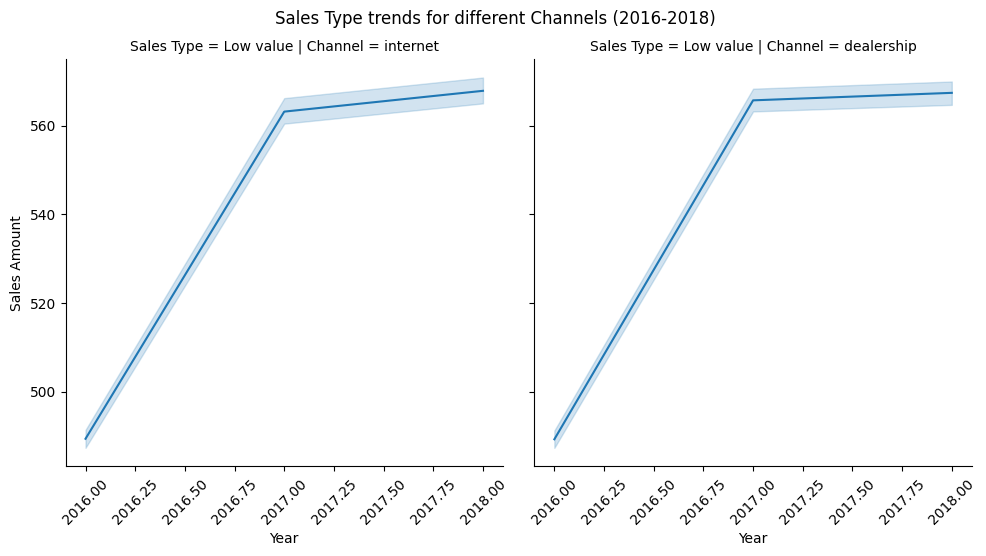

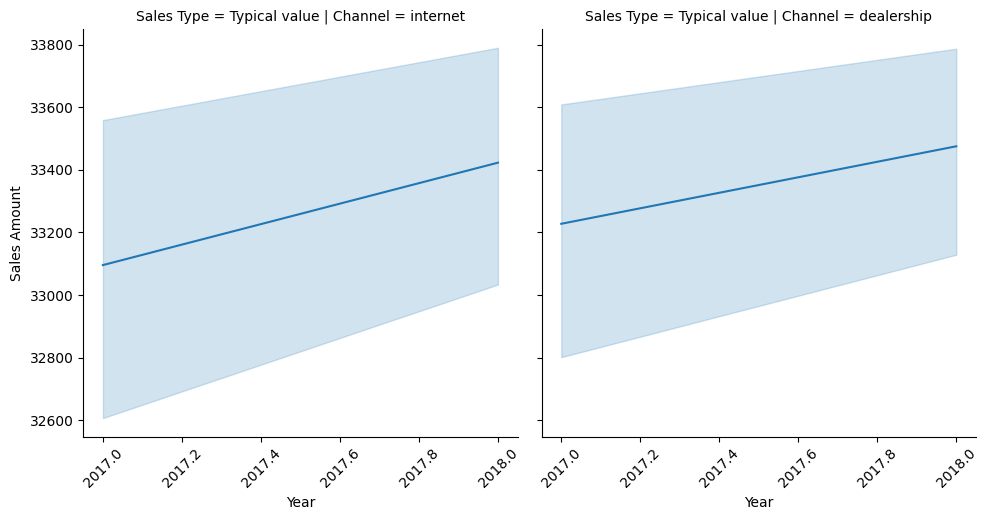

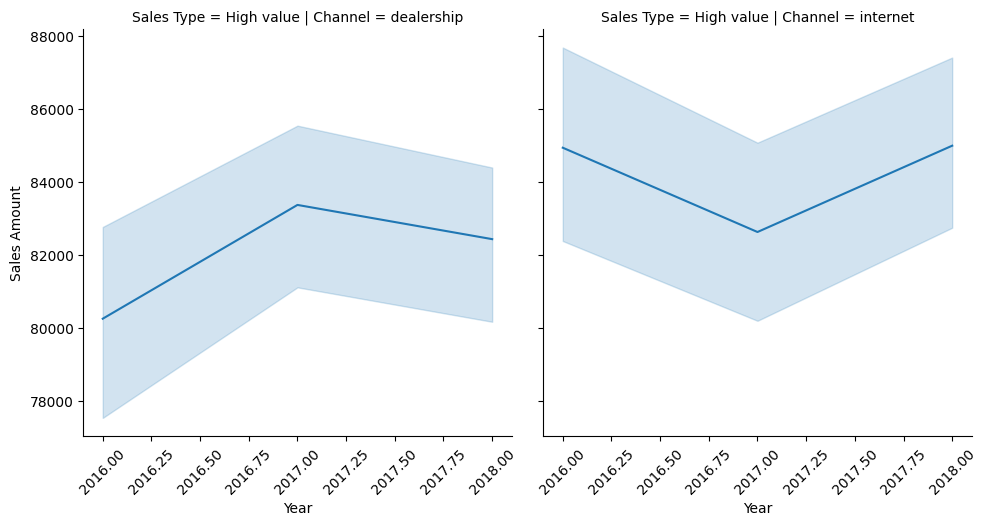

In [31]:
#3.3 visualization
sales_from_dealershipstates.rename(columns={'sales_year': 'Year',
                                            'sales_type': 'Sales Type',
                                            'sales_amount': 'Sales Amount',
                                            'channel': 'Channel'},
                                             inplace=True)


g3_1 = sns.relplot(data = 
                   sales_from_dealershipstates.loc[sales_from_dealershipstates["Sales Type"]=='Low value'],
                 x = 'Year',
                 y = 'Sales Amount',
                 row = 'Sales Type',
                 col = 'Channel',
                 markers = True,
                 kind = 'line')

g3_2 = sns.relplot(data = sales_from_dealershipstates.loc[sales_from_dealershipstates["Sales Type"]=='Typical value'],
                 x = 'Year',
                 y = 'Sales Amount',
                 row = 'Sales Type',
                 col = 'Channel',
                 markers = True,
                 kind = 'line')

g3_3 = sns.relplot(data = sales_from_dealershipstates.loc[sales_from_dealershipstates["Sales Type"]=='High value'],
                 x = 'Year',
                 y = 'Sales Amount',
                 row = 'Sales Type',
                 col = 'Channel',
                 markers = True,
                 kind = 'line')

for g in [g3_1, g3_2, g3_3]:
    g3.fig.suptitle("Sales Type trends for different Channels (2016-2018)", y=1.03)
    for ax in g.axes.flat:
        for label in ax.get_xticklabels():
            label.set_rotation(45)

g3_1.fig.suptitle("Sales Type trends for different Channels (2016-2018)", y=1.03)
plt.show();

# ## Part 4: Takeaways from the analysis

Provide your thoughts about the analysis above by answering the following questions in the blank markdown cells provided below. No code should be run for this section.


   1. (Part 1) What are some potential hypotheses as to why the top 5 performing states have the highest sales amounts?  Describe how you would test your hypotheses in further analysis.  Do not conduct any additional analyses or write any more queries, just describe in words.
          
          
   2. (Part 1) What are some potential hypotheses as to why the bottom 5 performing states have the lowest sales amounts?  Describe how you would test your hypotheses in further analysis.  Do not conduct any additional analyses or write any more queries, just describe in words.
   
   
   3. (Part 2): How would you characterize the historical performance of the dealerships visualized in Part 2 (e.g. good, bad, growing, declining, etc.)?  Describe some of the trends in relative performance over time for the dealerships.  Be specific and cite specific elements of the visualization created in Part 2 to support your claims.  Specify any additional factors you would want to consider that would influence your performance assessment. 
     
     
   4. (Part 3):  How does the distribution of sales amounts change from one year to the next for each channel and sale type?  Are the number of transactions for certain channels and sales types increasing or decreasing over time?  For each sale type and channel, is the distribution of sales amounts changing over time (e.g. Are the typical sales amounts for low value internet sales shifting from 2016 to 2018? If so, how are the values shifting over time?)  Be specific and cite specific elements of the visualization created in Part 3 to support your claims. 
   
   
   5. (Part 3): What are some potential hypotheses as to why the distribution of sales amounts compared across channel, year, and sales type behaves in the manner you described in 4.4?  Describe how you would test your hypotheses in further analysis.  Do not conduct any additional analyses or write any more queries, just describe in words.

### Part 4 Responses

For each of the following questions, answer in as much preciseness and clarity that you can. Refer back to the tables and plots that you have created to back up your answers if necessary. Answer each question in the cell below. You are NOT to code anything for this section. This is for you to reflect on the analysis developed in response to Parts 1-3.

1. (Part 1) What are some potential hypotheses as to why the top 5 performing states have the highest sales amounts?  Describe how you would test your hypotheses in further analysis.  Do not conduct any additional analyses or write any more queries, just describe in words.

 2. (Part 1) What are some potential hypotheses as to why the bottom 5 performing states have the lowest sales amounts?  Describe how you would test your hypotheses in further analysis.  Do not conduct any additional analyses or write any more queries, just describe in words.

3. (Part 2): How would you characterize the historical performance of the dealerships visualized in Part 2 (e.g. good, bad, growing, declining, etc.)?  Describe some of the trends in relative performance over time for the dealerships.  Be specific and cite specific elements of the visualization created in Part 2 to support your claims.  Specify any additional factors you would want to consider that could influence your performance assessment. 


 4. (Part 3):  How does the distribution of sales amounts change from one year to the next for each channel and sale type?  Are the number of transactions for certain channels and sales types increasing or decreasing over time?  For each sale type and channel, is the distribution of sales amounts changing over time (e.g. Are the typical sales amounts for low value internet sales shifting from 2016 to 2018? If so, how are the values shifting over time?)  Be specific and cite specific elements of the visualization created in Part 3 to support your claims. 

5. (Part 3): What are some potential hypotheses as to why the distribution of sales amounts compared across channel, year, and sales type behaves in the manner you described in 4.4?  Describe how you would test your hypotheses in further analysis.  Do not conduct any additional analyses or write any more queries, just describe in words.